<ipython-input-26-0a0d4db4b3cc>:10: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('/content/KwhConsumptionBlower78_2.csv', parse_dates=[['TxnDate', 'TxnTime']])  # Combine 'TxnDate' and 'TxnTime'
<ipython-input-26-0a0d4db4b3cc>:24: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df['Consumption'].resample('H').sum()  # 'H' stands for hourly resampling


      TxnDate_TxnTime  Unnamed: 0  Consumption
0 2022-01-21 01:57:23           0        4.632
1 2022-01-21 06:15:59           1        6.080
2 2022-01-21 13:11:00           2        3.194
3 2022-01-21 15:22:43           3        2.038
4 2022-01-21 22:01:21           4        7.428
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TxnDate_TxnTime  630 non-null    datetime64[ns]
 1   Unnamed: 0       630 non-null    int64         
 2   Consumption      630 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 14.9 KB
None
                     TxnDate_TxnTime  Unnamed: 0  Consumption
count                            630  630.000000   630.000000
mean   2022-01-26 11:08:13.747619072  314.500000     3.657908
min              2022-01-21 00:09:17    0.000000     0.840000
25%    2022-01-23 13:57:45

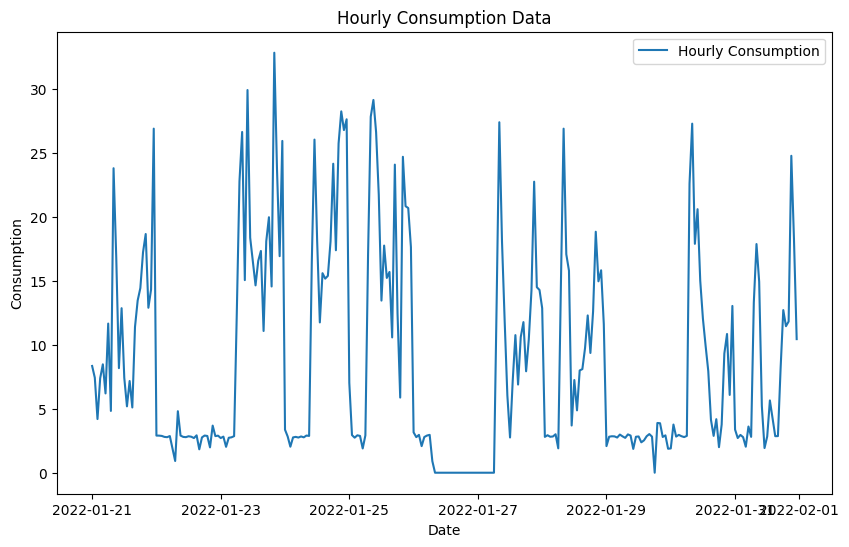

<ipython-input-26-0a0d4db4b3cc>:40: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = hourly_data.asfreq('H')


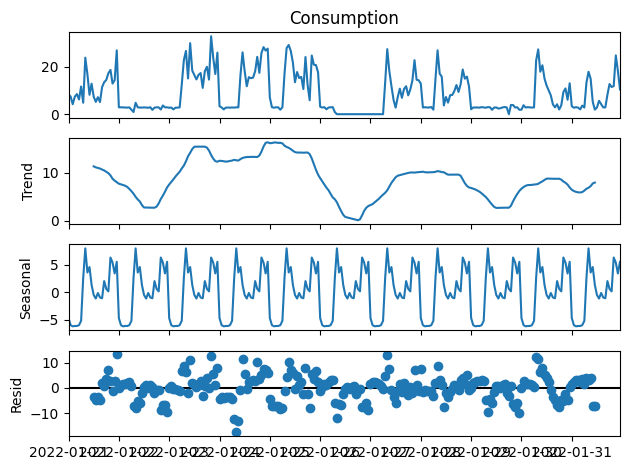

RMSE: 21.93085034826717
Mean Consumption: 8.729098484848485
Standard Deviation of Consumption: 8.077751440845015


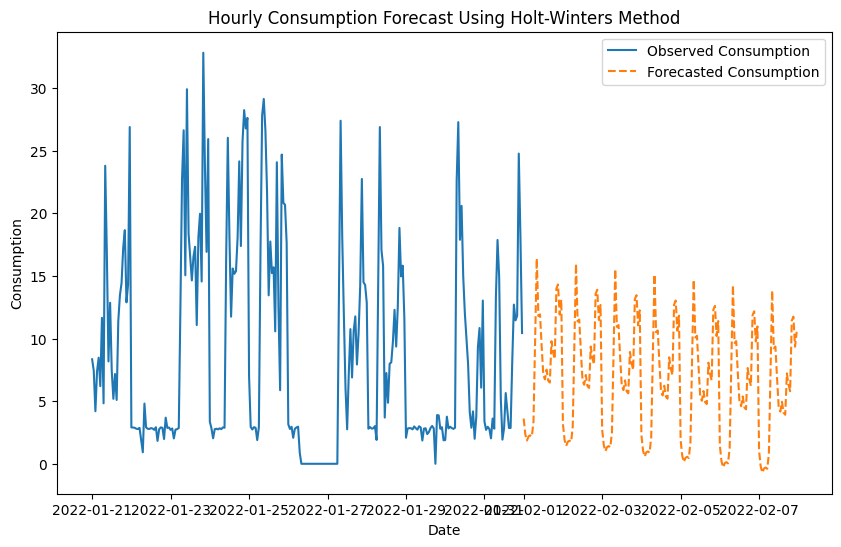

2022-02-01 00:00:00     3.612844
2022-02-01 01:00:00     2.346638
2022-02-01 02:00:00     1.855176
2022-02-01 03:00:00     2.190065
2022-02-01 04:00:00     2.271576
                         ...    
2022-02-07 19:00:00     5.798201
2022-02-07 20:00:00    11.428628
2022-02-07 21:00:00    11.754254
2022-02-07 22:00:00     9.347452
2022-02-07 23:00:00    10.541840
Freq: h, Length: 168, dtype: float64


In [26]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

# Step 2: Load dataset and parse the 'TxnDate' column as datetime
df = pd.read_csv('/content/KwhConsumptionBlower78_2.csv', parse_dates=[['TxnDate', 'TxnTime']])  # Combine 'TxnDate' and 'TxnTime'

# Step 3: Initial data exploration
print(df.head())  # Display first few rows
print(df.info())  # Data information
print(df.describe())  # Summary statistics

# Rename the combined date and time column
df.rename(columns={'TxnDate_TxnTime': 'TxnDateTime'}, inplace=True)

# Step 4: Set the 'TxnDateTime' as the index
df.set_index('TxnDateTime', inplace=True)

# Step 5: Resample the data to hourly frequency (sum of consumption per hour)
hourly_data = df['Consumption'].resample('H').sum()  # 'H' stands for hourly resampling

# Step 6: Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(hourly_data, label='Hourly Consumption')
plt.title('Hourly Consumption Data')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()

# Step 7: Import statsmodels libraries for time series analysis
# (Already imported above)

# Step 8: Decompose the time series into its additive components and plot them
# Ensure that the data has a frequency and decompose using seasonal_decompose
hourly_data = hourly_data.asfreq('H')
decomposition = seasonal_decompose(hourly_data, model='additive', period=24)  # Assuming daily seasonality
decomposition.plot()
plt.show()

# Step 9: Train/Test Split and RMSE Calculation
# Split the data into train and test sets
train_data = hourly_data[:-24*7]  # Use all but the last 30 days (30*24 hours) for training
test_data = hourly_data[-24*30:]   # Last 30 days for testing

# Fit a Holt-Winters model to the training data
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=24)  # 24-hour period
hw_model = model.fit()

# Make predictions for the test set
predictions = hw_model.forecast(len(test_data))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'RMSE: {rmse}')

# Step 10: Mean and Standard Deviation of the entire dataset
mean_consumption = hourly_data.mean()
std_consumption = hourly_data.std()
print(f'Mean Consumption: {mean_consumption}')
print(f'Standard Deviation of Consumption: {std_consumption}')

# Step 11: Fit Holt-Winters model to the entire dataset and make future predictions
hw_full_model = ExponentialSmoothing(hourly_data, trend='add', seasonal='add', seasonal_periods=24).fit()
forecast_periods = 24 * 7  # Predict the next 7 days (7*24 hours)
future_predictions = hw_full_model.forecast(forecast_periods)

# Step 12: Plot the original consumption data and the predictions
plt.figure(figsize=(10, 6))
plt.plot(hourly_data, label='Observed Consumption')
plt.plot(future_predictions, label='Forecasted Consumption', linestyle='--')
plt.title('Hourly Consumption Forecast Using Holt-Winters Method')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()

# Optionally, print the forecasted values
print(future_predictions)


In [ ]:


# Load the dataset
data = pd.read_csv('/content/KwhConsumptionBlower78_2.csv', index_col='TxnTime', parse_dates=True)



<ipython-input-14-00e195bf5f0a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('/content/KwhConsumptionBlower78_2.csv', index_col='TxnTime', parse_dates=True)


In [ ]:
data = data['Consumption'].resample('MS').mean()



In [ ]:
scaler = MinMaxScaler()
data_scaled = pd.Series(scaler.fit_transform(data.values.reshape(-1, 1)).flatten(), index=data.index)

In [ ]:
train_data = data_scaled[:int(len(data_scaled) * 0.8)]
test_data = data_scaled[int(len(data_scaled) * 0.8):]

In [ ]:
fitted_model_add = ExponentialSmoothing(
    train_data, trend='add', seasonal='add', seasonal_periods=2
).fit()



ValueError: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.

In [ ]:
# Load the dataset
data = pd.read_csv('/content/KwhConsumptionBlower78_1.csv', index_col='TxnDate', parse_dates=True)
data = data['Consumption'].resample('MS').mean()
scaler = MinMaxScaler()
data_scaled = pd.Series(scaler.fit_transform(data.values.reshape(-1, 1)).flatten(), index=data.index)

# Ensure you have enough data points for two full seasonal cycles
# If not, consider gathering more data or adjusting seasonal_periods accordingly
if len(data_scaled) < 2 * 12:  # 12 is the seasonal_periods value
    # Option 1: Gather more data or use all the data and see what other errors will occur
    # Option 2: Adjust seasonal_periods
    seasonal_periods = len(data_scaled) // 2
    if seasonal_periods < 2:
        seasonal_periods = 2
else:
    seasonal_periods = 12


train_data = data_scaled[:int(len(data_scaled) * 0.8)]
test_data = data_scaled[int(len(data_scaled) * 0.8):]

fitted_model_add = ExponentialSmoothing(
    train_data, trend='add', seasonal='add', seasonal_periods=seasonal_periods
).fit()

<ipython-input-21-88312f6d3f18>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('/content/KwhConsumptionBlower78_1.csv', index_col='TxnDate', parse_dates=True)


ValueError: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.